# Chapter 3 Clasification (p.83)
## Preparation : figure relations 

In [32]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "/", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Preparation : Load MNIST dataset (p.83)

In [33]:
### pip install keras (事前にインストールしておく)
### pip install tensorflow 

In [34]:
from keras.datasets import mnist

In [35]:
mnist

<module 'keras.datasets.mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\keras\\datasets\\mnist.py'>

In [36]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(60000,784)/255
X_test=X_test.reshape(10000,784)/255

In [37]:
import numpy as np
#some_digit = X[36000] in book
idx=36000
size=28
a,b=np.meshgrid(range(size),range(size))
some_digit=X_train[idx]
some_digit_image=X_train[idx].reshape(size,size)
some_digit_image=some_digit_image[::-1,:]
#print('number:{}'.format(y_train[idx]))



In [38]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [39]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [40]:
sgd_clf.predict([X_train[36000]])

array([False], dtype=bool)

In [41]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Performance measure(p.88)
## Precision and Recall  (p.91)

機械学習でよく使われる評価尺度の種類(分類タスク)

1. AUC
2. Accuracy
3. F-measure
4. Specificity
5. Recall
6. Precision

http://tkdmah.hatenablog.com/entry/2014/02/22/193008

- モデル評価精度は、AUCがよく使われる
- Accuracy=正例・負例を平等に着目した指標
- Precision, Recall, F-measure=正例に着目した指標

$$
\begin{array}{|c||c|c|}
N=60,000 & Predicted:NO & Predicted:YES \\\hline 
Actual:NO & 53943[True~Positives(TP)] & 636[False~Negatives(FN)] \\\
Actual:YES & 1137[False~Positives(FP)] & 4284[True~Negatives(TN)]
\end{array}
$$

$$
\begin{eqnarray}
&& precision  =  \frac{TP}{TP + FP} \\
&& recall( sensitivity, True  Positive  Rate) = \frac{TP}{ TP + FN }\\
&& F-measure = \frac{2*precision*recall}{precision+recall}
\end{eqnarray}
$$

In [42]:
from sklearn.metrics import precision_score,recall_score

In [43]:
precision_score(y_train_5, y_train_pred)

0.88860875544350215

In [44]:
recall_score(y_train_5, y_train_pred)

0.71518170079321164

F-measure(F値)は、PrecisionとRecallの調和平均。

3評価尺度の事例
https://siguniang.wordpress.com/2016/01/10/notes-on-information-retrieval-precision-recall-f1-score/

In [45]:
from sklearn.metrics import f1_score

In [46]:
f1_score(y_train_5, y_train_pred)

0.79251839738348329

# Precision/Recall tradeoff

![Figure3-3](./F3-3.png) 

- 左スコアが最低値、右スコアが最高値。
- 決定閾値を中央の矢印に配置
- 閾値を上げるには、右の矢印に移動
- 閾値を上げるとPrecisionが増加してRecallが低下
- 閾値を下げるとRecallが増加してPrecisionが低下

decision_function() methodで閾値を変化させる


In [47]:
y_scores = sgd_clf.decision_function([some_digit]) 
y_scores

array([-6.47015835])

In [48]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [49]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

↑[オリジナル](https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb) にコメント有：there is an issue introduced in Scikit-Learn 0.19.0 

In [50]:
y_scores.shape

(60000,)

In [51]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [52]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

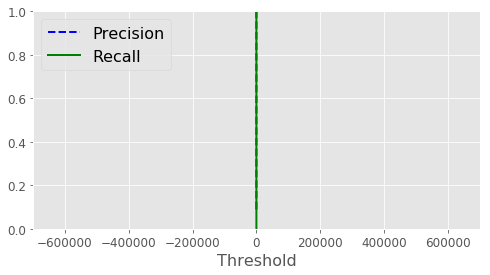

In [55]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt    

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.savefig("f3_4_tradeoff.png")
plt.show()

In [ ]:
(y_train_pred == (y_scores > 0)).all()

In [56]:
y_train_pred_90 = (y_scores > 70000)

In [57]:
precision_score(y_train_5, y_train_pred_90)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [58]:
recall_score(y_train_5, y_train_pred_90)

0.0

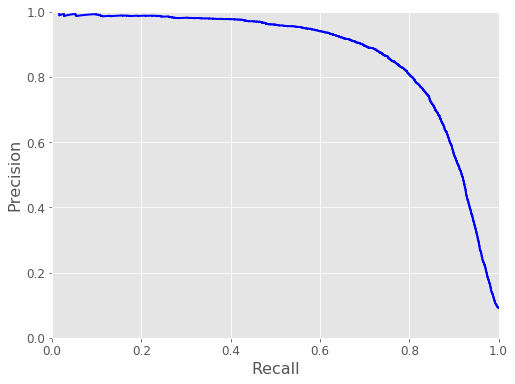

In [60]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.savefig("f3_5_prec_vs_recall.png")
plt.show()

# ROC curve

In [61]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

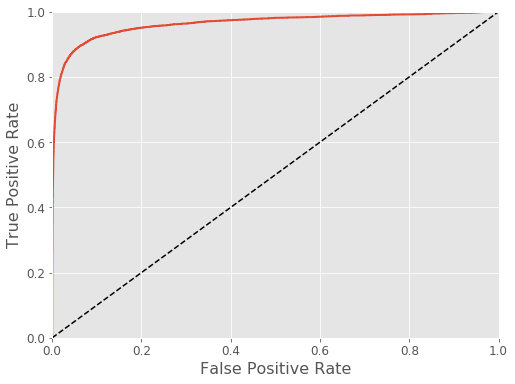

In [63]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.savefig("f3_6.png")
plt.show()

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.96374281959495978

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [66]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

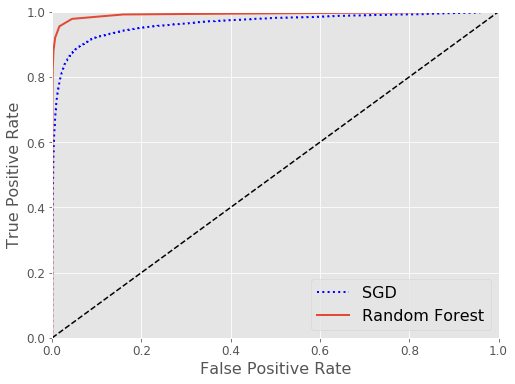

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.savefig("f3_7.png")
plt.show()

In [68]:
roc_auc_score(y_train_5, y_scores_forest)

0.99205274926983056

In [69]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.98604651162790702

In [70]:
recall_score(y_train_5, y_train_pred_forest)

0.82125069175428889

# Multiclass classification
# Error Analysis
# Multilabel classification
# Multioutput classification

In [71]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([9], dtype=uint8)

In [72]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-49.03860853, -10.50265808, -14.50777368,  -4.42794642,
         -2.8716471 ,  -6.47015835, -16.42240095,  -8.60876908,
        -10.03451117,  -1.31876744]])

In [73]:
np.argmax(some_digit_scores)

9

In [74]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [75]:
sgd_clf.classes_[5]

5

In [76]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([9], dtype=uint8)

In [77]:
len(ovo_clf.estimators_)

45

In [78]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([9], dtype=uint8)

In [79]:
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [81]:
#added for succeeding data load
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96805,  0.9652 ,  0.96525])

In [82]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.88517297,  0.8740937 ,  0.87568135])

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.90736853,  0.90884544,  0.91363705])

In [86]:
# added for data loading
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[5989, 6823, 5785, 5802, 5743,  611, 5948, 6128, 5725, 6025],
       [  74,   38,   43,  199,   71, 4584,  116,   26,  175,   95],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [87]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5726,    2,   26,   12,   11,   47,   47,    9,   39,    4],
       [   1, 6479,   42,   33,    8,   39,    8,    9,  113,   10],
       [  55,   35, 5319,  104,   79,   20,  106,   51,  174,   15],
       [  45,   40,  145, 5372,    3,  210,   33,   50,  135,   98],
       [  17,   26,   38,    8, 5361,    5,   57,   31,   86,  213],
       [  74,   38,   43,  199,   71, 4584,  116,   26,  175,   95],
       [  33,   22,   43,    2,   42,   90, 5640,    3,   43,    0],
       [  24,   23,   73,   29,   60,   12,    4, 5774,   18,  248],
       [  49,  165,   73,  150,   16,  153,   50,   24, 5038,  133],
       [  39,   31,   26,   92,  163,   35,    3,  177,   79, 5304]])

In [88]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

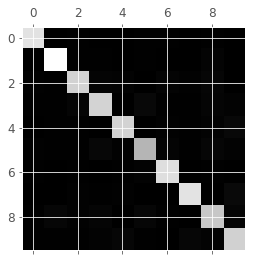

In [89]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_plot.png", tight_layout=False)
plt.show()

In [90]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

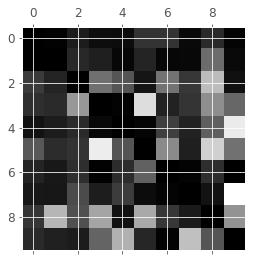

In [92]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_errors_plot.png", tight_layout=False)
plt.show()

In [94]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

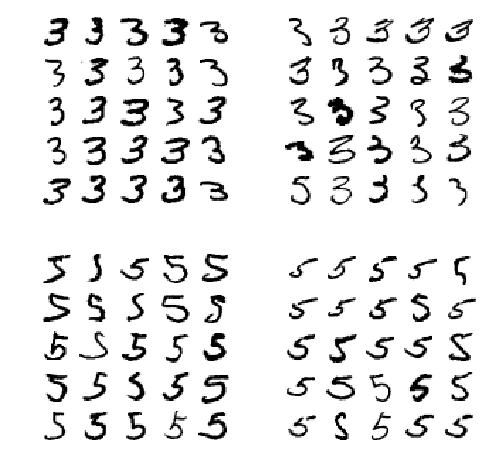

In [95]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.savefig("error_analysis_digits_plot.png")
plt.show()